In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_d0dc69483f8a4de1ab6c1df09fbbadbc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jq-L-7BvvoaQ2eUnOB2WhhlSTfAITigHiF0vI4CCsWVD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d0dc69483f8a4de1ab6c1df09fbbadbc.get_object(Bucket='usecases-donotdelete-pr-x1wobylqzjzfnc',Key='forestfires.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


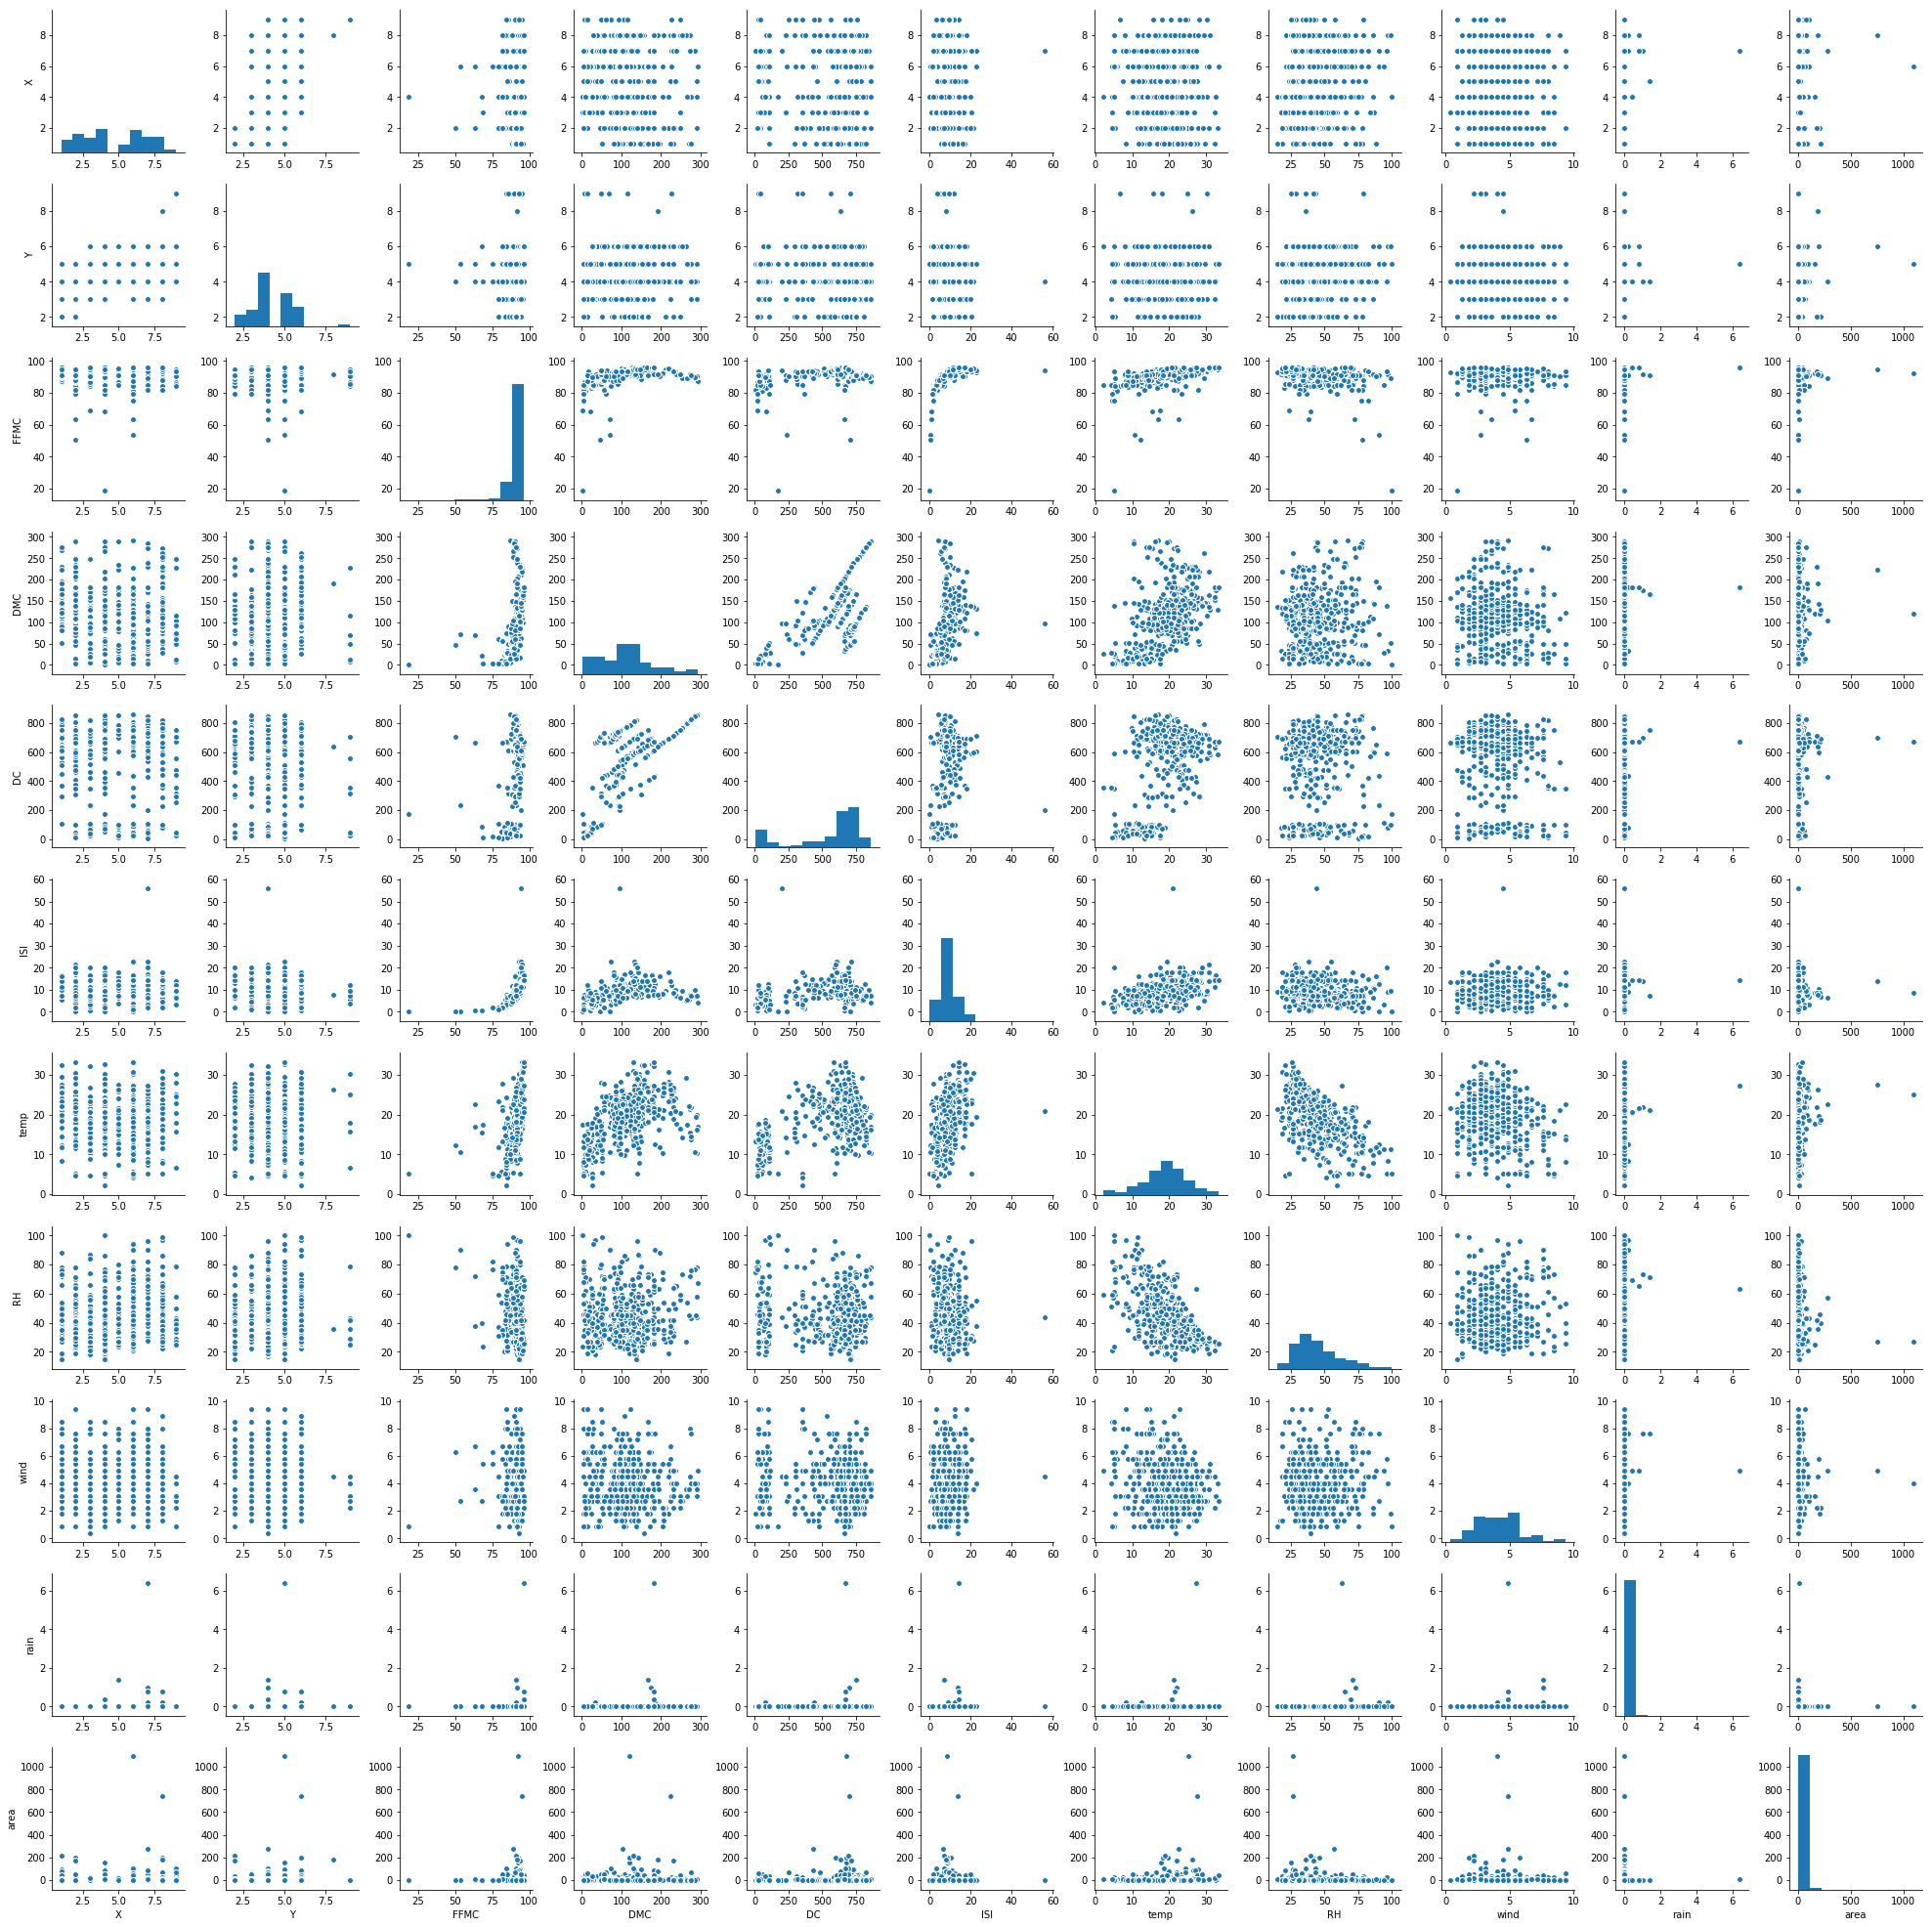

In [6]:
sns.pairplot(df)

In [7]:
df=df.drop(columns="month")

In [8]:
df=df.drop(columns="day")

In [9]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
y_pred=regressor.predict([[7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0]])

In [14]:
y_pred

array([ 5.049])

In [29]:
!pip install watson-machine-learning-client --upgrade

    100% |████████████████████████████████| 942kB 1.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-le

In [15]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-04-23 06:58:37,337 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-04-23 06:58:37,339 - watson_machine_learning_client.wml_client_error - WARNING - Publishing model failed.
Reason: Invalid type for ml_artifact: DataFrame
2019-04-23 07:07:27,684 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-04-23 07:07:49,232 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Err

In [16]:
wml_credentials = {
  "username": "5d84c453-2449-482b-9784-07bfc87097ee",
  "password": "9f6d627a-1f89-47a9-9fa3-15405257458d",
  "instance_id": "8ac3af8b-681b-4024-9166-311eb6f50447",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [17]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [18]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Sasidhar Pokuri", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sasipv28@gmail.com", 
               client.repository.ModelMetaNames.NAME: "forest fires"
              }

In [20]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [21]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'0594a1f0-ba4b-4d80-b29f-299b348507f3'

In [23]:
deployment = client.deployments.create(published_model_uid, name="forest fires")



#######################################################################################

Synchronous deployment creation for uid: '0594a1f0-ba4b-4d80-b29f-299b348507f3' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='fc001ba3-2aab-4011-891f-bf5f29e01957'
------------------------------------------------------------------------------------------------




In [24]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/8ac3af8b-681b-4024-9166-311eb6f50447/deployments/fc001ba3-2aab-4011-891f-bf5f29e01957/online'